# Custumer Segmentation with Unsupervised Learning

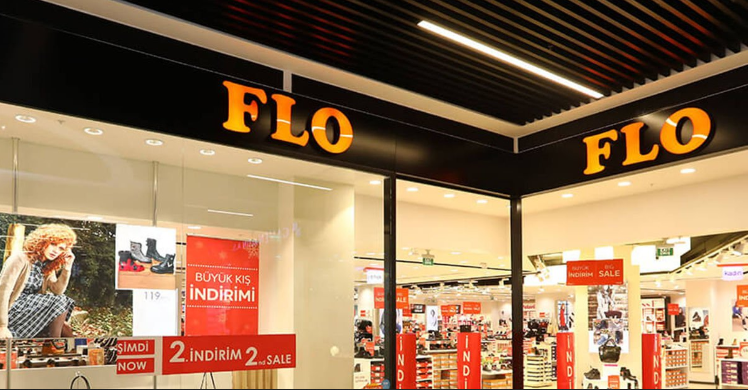

FLO wants to segment its customers and develop marketing strategies based on these segments. To do this, the behaviors of customers will be defined and groups will be created based on clustering of these behaviors.
___
The dataset consists of information on the past purchasing behaviors of customers who made their most recent purchases with FLO in the years 2020 - 2021 as OmniChannel (shopping both online and offline).
___
Variables:

master_id: unique customer id<br>
order_channel: Shopping platform (Android, ios, Desktop, Mobile)<br>
last_order_channel: The latest shopping platform<br>
first_order_date: First purchase date<br>
last_order_date: Last purchase date<br>
last_order_date_online: Last purchase date on online platform<br>
last_order_date_offline: Last purchase date on online platform<br>
order_num_total_ever_online: Total purchase on online platform<br>
order_num_total_ever_offline: Total purchase on offline platform<br>
customer_value_total_ever_offline: Total monetary on offline platform<br>
customer_value_total_ever_online: Total monetary on online platform<br>
interested_in_categories_12: A list of the categories that the customer has shopped in during the last 12 months.

**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

import warnings


warnings.filterwarnings('ignore')

## Task 1: Data Preparing 

**Step 1: Read csv file**

In [3]:
df = pd.read_csv('flo_data_20k.csv')

In [3]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [5]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

**Create total_order and total_value**

In [4]:
df['total_order'] = df['order_num_total_ever_online'] + df['order_num_total_ever_offline']

In [5]:
df['total_value'] = df['customer_value_total_ever_offline'] + df['customer_value_total_ever_online']

In [6]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98


**Convert dates to datetime objects**

In [7]:
dates = ['first_order_date', 'last_order_date', 'last_order_date_online', 'last_order_date_offline']
df[dates] = df[dates].apply(pd.to_datetime)

In [8]:
df.dtypes

master_id                                    object
order_channel                                object
last_order_channel                           object
first_order_date                     datetime64[ns]
last_order_date                      datetime64[ns]
last_order_date_online               datetime64[ns]
last_order_date_offline              datetime64[ns]
order_num_total_ever_online                 float64
order_num_total_ever_offline                float64
customer_value_total_ever_offline           float64
customer_value_total_ever_online            float64
interested_in_categories_12                  object
total_order                                 float64
total_value                                 float64
dtype: object

**Step 2: Select the variables that you will use to segment the customers.**

**Tenure and recency**

In [9]:
today_date = df['last_order_date'].max() + dt.timedelta(days=2)
today_date

Timestamp('2021-06-01 00:00:00')

In [10]:
df['Tenure'] = df['first_order_date'].apply(lambda x: (today_date - x).days)

In [11]:
df['Recency'] = df['last_order_date'].apply(lambda x: (today_date - x).days)

In [12]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,total_order,total_value,Tenure,Recency
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37,214,95
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55,1574,105
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32,552,186
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97,146,135
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98,668,86


In [18]:
X = df[['total_order', 'total_value', 'Tenure', 'Recency', 
        'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'order_num_total_ever_online', 'order_num_total_ever_offline']]

In [19]:
X

,total_order,total_value,Tenure,Recency,customer_value_total_ever_offline,customer_value_total_ever_online,order_num_total_ever_online,order_num_total_ever_offline
0,5.0,939.37,214,95,139.99,799.38,4.0,1.0
1,21.0,2013.55,1574,105,159.97,1853.58,19.0,2.0
2,5.0,585.32,552,186,189.97,395.35,3.0,2.0
3,2.0,121.97,146,135,39.99,81.98,1.0,1.0
4,2.0,209.98,668,86,49.99,159.99,1.0,1.0
...,...,...,...,...,...,...,...,...
19940,3.0,401.96,619,331,289.98,111.98,1.0,2.0
19941,2.0,390.47,457,161,150.48,239.99,1.0,1.0
19942,3.0,632.94,629,8,139.98,492.96,2.0,1.0
19943,6.0,1009.77,797,108,711.79,297.98,1.0,5.0


## Task 2: Customer Segmentation with K-Means

**Step 1: Scaling**

In [20]:
sc = MinMaxScaler((0, 1))

In [21]:
df = sc.fit_transform(X)

In [23]:
df[:5]

array([[0.015     , 0.01950257, 0.06841244, 0.25479452, 0.00717814,
        0.01739526, 0.01507538, 0.        ],
       [0.095     , 0.04292553, 0.51358429, 0.28219178, 0.00828145,
        0.04071459, 0.09045226, 0.00925926],
       [0.015     , 0.01178235, 0.17905074, 0.50410959, 0.00993808,
        0.00845796, 0.01005025, 0.00925926],
       [0.        , 0.0016788 , 0.04615385, 0.36438356, 0.00165607,
        0.00152609, 0.        , 0.        ],
       [0.        , 0.0035979 , 0.21702128, 0.23013699, 0.00220828,
        0.0032517 , 0.        , 0.        ]])

**Step 2: Optimum n_cluster**

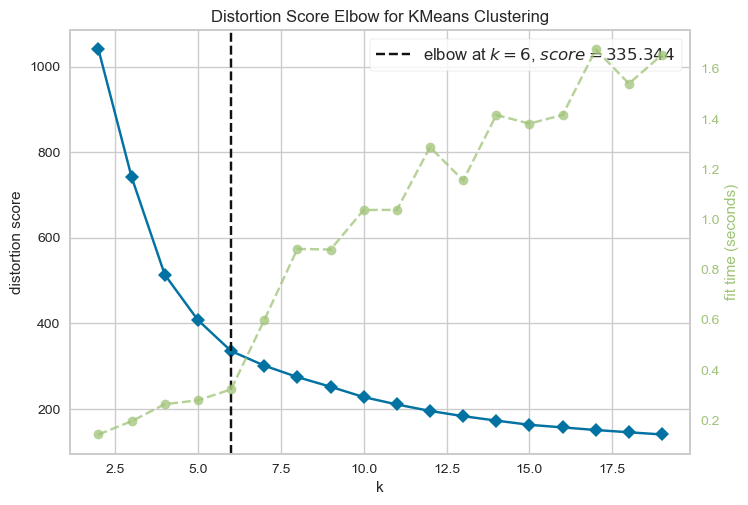

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(df)
elbow.show()

In [25]:
elbow.elbow_value_

6

**Step 3: Model**

In [26]:
k_means = KMeans(n_clusters=elbow.elbow_value_, random_state=17).fit(df)

In [27]:
k_means.cluster_centers_

array([[0.0090355 , 0.01099621, 0.2291438 , 0.86926049, 0.0114801 ,
        0.00704275, 0.00530661, 0.00695449],
       [0.01203284, 0.01334191, 0.19967345, 0.29667226, 0.01369623,
        0.0085346 , 0.00724295, 0.00893722],
       [0.01060749, 0.01272367, 0.21666134, 0.54587331, 0.01225566,
        0.00848449, 0.00680299, 0.00710836],
       [0.02599298, 0.01866701, 0.65375472, 0.71154834, 0.01326402,
        0.01410975, 0.02147649, 0.00856273],
       [0.03840554, 0.02801718, 0.61421099, 0.19016204, 0.01532089,
        0.02277103, 0.03281752, 0.01065205],
       [0.0147918 , 0.01652635, 0.18889337, 0.07950291, 0.0144199 ,
        0.01147514, 0.00999348, 0.00897831]])

In [28]:
k_means.labels_

array([1, 4, 2, ..., 5, 1, 0])

In [29]:
X['cluster'] = k_means.labels_ + 1

In [30]:
X

,total_order,total_value,Tenure,Recency,customer_value_total_ever_offline,customer_value_total_ever_online,order_num_total_ever_online,order_num_total_ever_offline,cluster
0,5.0,939.37,214,95,139.99,799.38,4.0,1.0,2
1,21.0,2013.55,1574,105,159.97,1853.58,19.0,2.0,5
2,5.0,585.32,552,186,189.97,395.35,3.0,2.0,3
3,2.0,121.97,146,135,39.99,81.98,1.0,1.0,2
4,2.0,209.98,668,86,49.99,159.99,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...
19940,3.0,401.96,619,331,289.98,111.98,1.0,2.0,1
19941,2.0,390.47,457,161,150.48,239.99,1.0,1.0,3
19942,3.0,632.94,629,8,139.98,492.96,2.0,1.0,6
19943,6.0,1009.77,797,108,711.79,297.98,1.0,5.0,2


**Step 4: Evaulation Model**

In [32]:
pd.set_option('display.max_columns', None)

In [33]:
X.groupby('cluster').agg(['count', 'mean', 'median'])

total_order                  total_value                       Tenure  \
              count      mean median       count         mean   median  count   
cluster                                                                         
1              2535  3.807101    3.0        2535   549.267396  442.930   2535   
2              4626  4.407263    4.0        4626   656.942953  503.965   4626   
3              3923  4.122865    3.0        3923   628.581272  485.930   3923   
4               997  7.198596    5.0         997   901.051484  660.880    997   
5              1662  9.681107    7.0        1662  1329.851161  914.185   1662   
6              6202  4.956304    4.0        6202   802.591272  598.240   6202   

                             Recency                     \
                mean  median   count        mean median   
cluster                                                   
1         705.034320   653.0    2535  319.280079  323.0   
2         615.047557   615.5    4626  110.366407  109.0   
3         666.921234   633.0    3923  201.278613  197.0   
4        2002.220662  1980.0     997  261.715145  258.0   
5        1881.414561  1807.0    1662   71.409146   70.0   
6         582.079329   594.0    6202   31.056756   28.0   

        customer_value_total_ever_offline                       \
                                    count        mean   median   
cluster                                                          
1                                    2535  217.894663  150.730   
2                                    4626  258.009503  180.480   
3                                    3923  231.894305  165.710   
4                                     997  250.200020  174.980   
5                                    1662  287.448153  202.085   
6                                    6202  271.148284  189.980   

        customer_value_total_ever_online                        \
                                   count         mean   median   
cluster                                                          
1                                   2535   331.372734  219.980   
2                                   4626   398.933450  246.940   
3                                   3923   396.686967  257.970   
4                                    997   650.851464  370.960   
5                                   1662  1042.403008  584.810   
6                                   6202   531.442988  328.885   

        order_num_total_ever_online                   \
                              count      mean median   
cluster                                                
1                              2535  2.056016    1.0   
2                              4626  2.441850    2.0   
3                              3923  2.354830    2.0   
4                               997  5.273821    3.0   
5                              1662  7.530686    5.0   
6                              6202  2.987101    2.0   

        order_num_total_ever_offline                   
                               count      mean median  
cluster                                                
1                               2535  1.751085    1.0  
2                               4626  1.965413    1.0  
3                               3923  1.768035    1.0  
4                                997  1.924774    1.0  
5                               1662  2.150421    2.0  
6                               6202  1.969203    1.0

## Task 3: Customer Segmentation with Hierarchical Cluster

**Step 1: Determine the optimum n cluster with dataframe used to task-2**

In [34]:
df

array([[0.015     , 0.01950257, 0.06841244, ..., 0.01739526, 0.01507538,
        0.        ],
       [0.095     , 0.04292553, 0.51358429, ..., 0.04071459, 0.09045226,
        0.00925926],
       [0.015     , 0.01178235, 0.17905074, ..., 0.00845796, 0.01005025,
        0.00925926],
       ...,
       [0.005     , 0.01282073, 0.20425532, ..., 0.01061713, 0.00502513,
        0.        ],
       [0.02      , 0.02103767, 0.25924714, ..., 0.00630409, 0.        ,
        0.03703704],
       [0.        , 0.00473156, 0.20687398, ..., 0.00462294, 0.        ,
        0.        ]])

In [35]:
hc_average = linkage(df, 'average')

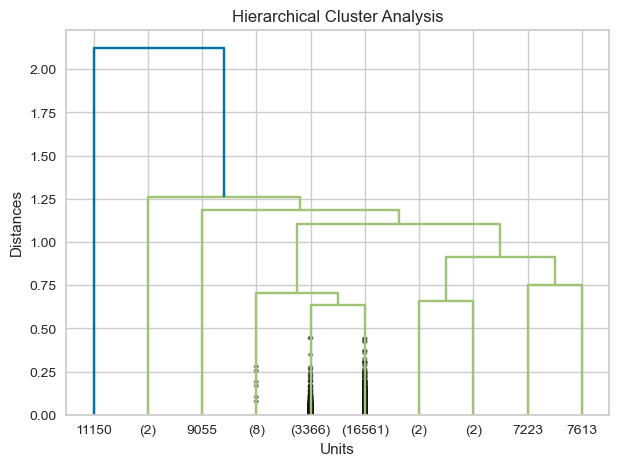

In [37]:
plt.figure(figsize=(7, 5))
plt.title("Hierarchical Cluster Analysis")
plt.xlabel("Units")
plt.ylabel("Distances")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()

**Step 2: Model and customer segmentation**

In [38]:
cluster = AgglomerativeClustering(n_clusters=5, linkage="average")

In [39]:
clusters = cluster.fit_predict(df)

In [40]:
X['hiar_cluster'] = clusters + 1

**Step 3: Evaulation results**

In [41]:
X.groupby('hiar_cluster').agg(['count', 'mean', 'median'])

total_order                    total_value                \
                   count        mean median       count          mean   
hiar_cluster                                                            
1                      6   72.000000   70.0           6  24934.696667   
2                  19935    4.985302    4.0       19935    739.824029   
3                      2   99.500000   99.5           2   9477.835000   
4                      1    4.000000    4.0           1  20706.340000   
5                      1  202.000000  202.0           1  45905.100000   

                        Tenure                      Recency              \
                 median  count         mean  median   count        mean   
hiar_cluster                                                              
1             24835.490      6  1465.500000  1256.5       6   44.166667   
2               544.930  19935   801.039679   651.0   19935  134.481816   
3              9477.835      2   810.500000   810.5       2  272.500000   
4             20706.340      1    55.000000    55.0       1   35.000000   
5             45905.100      1  2790.000000  2790.0       1   32.000000   

                    customer_value_total_ever_offline                          \
             median                             count         mean     median   
hiar_cluster                                                                    
1              40.5                                 6    484.89000    334.715   
2             111.0                             19935    252.02413    179.980   
3             272.5                                 2   9335.85500   9335.855   
4              35.0                                 1  18119.14000  18119.140   
5              32.0                                 1    684.97000    684.970   

             customer_value_total_ever_online                          \
                                        count          mean    median   
hiar_cluster                                                            
1                                           6  24449.806667  24144.18   
2                                       19935    487.799899    286.35   
3                                           2    141.980000    141.98   
4                                           1   2587.200000   2587.20   
5                                           1  45220.130000  45220.13   

             order_num_total_ever_online                     \
                                   count        mean median   
hiar_cluster                                                  
1                                      6   70.500000   68.0   
2                                  19935    3.080963    2.0   
3                                      2    1.500000    1.5   
4                                      1    1.000000    1.0   
5                                      1  200.000000  200.0   

             order_num_total_ever_offline                   cluster            \
                                    count       mean median   count      mean   
hiar_cluster                                                                    
1                                       6   1.500000    1.0       6  5.333333   
2                                   19935   1.904339    1.0   19935  3.662854   
3                                       2  98.000000   98.0       2  2.000000   
4                                       1   3.000000    3.0       1  6.000000   
5                                       1   2.000000    2.0       1  5.000000   

                     
             median  
hiar_cluster         
1               5.0  
2               3.0  
3               2.0  
4               6.0  
5               5.0